<h3>- Note that I will use the Dataset with the Risk column </h3>

<h1>Welcome to my Kernel ! </h1>

<h2>I will do some Explorations through the German Credit Risk to understand their distribuitions and patterns. </h2>

Look for another interesting Kernels on https://www.kaggle.com/kabure/kernels<br>
Give me your feedback and if yo like this kernel, <b>votes up</b>

# Tables of Content:

**1. [Introduction](#Introduction)** <br>
    - Info's about datasets
**2. [Librarys](#Librarys)** <br>
    - Importing Librarys
    - Importing Dataset
**3. [Knowning the data](#Known)** <br>
    - 3.1 Looking the Type of Data
    - 3.2 Shape of data
    - 3.3 Null Numbers
    - 3.4 Unique values
    - 3.5 The first rows of our dataset
**4. [Exploring some Variables](#Explorations)** <br>
    - 4.1 Ploting some graphical and descriptive informations
**5. [Correlation of data](#Correlation)** <br>
	- 5.1 Correlation Data
**6. [Preprocess](#Preprocessing)** <br>
	- 6.1 Importing Librarys
	- 6.2 Setting X and Y
    - 6.3 Spliting the X and Y in train and test 
**7. 1 [Model 1](#Modelling 1)** <br>
    - 7.1.1 Random Forest 
    - 7.1.2 Score values
    - 7.1.3 Cross Validation 
**7. 2 [Model 2](#Modelling 2)** <br>
    - 7.2.1 Logistic Regression 
    - 7.2.2 Score values
    - 7.2.3 Cross Validation 
    - 7.2.4 ROC Curve

<a id="Introduction"></a> <br>


# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

<h2>Content</h2>
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

In [41]:
import warnings
warnings.filterwarnings('ignore')

<i>English is not my first language, so, sorry about any error</i>

<a id="Librarys"></a> <br>
# **2. Librarys:** 
- Importing Librarys
- Importing Dataset

In [42]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [43]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [44]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


## 4.1 Creating an categorical variable to handle with the Age variable

In [45]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

## Looking the total of values in each categorical feature

In [46]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Transforming the data into Dummy variables

In [47]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [48]:
# df_credit.columns
df_credit[['Age_cat_Senior','Age_cat','Age_cat_Young','Age_cat_Adult']]

,Age_cat_Senior,Age_cat,Age_cat_Young,Age_cat_Adult
0,1,Senior,0,0
1,0,Student,0,0
2,0,Adult,0,1
3,0,Adult,0,1
4,0,Adult,0,1
...,...,...,...,...
995,0,Young,1,0
996,0,Adult,0,1
997,0,Adult,0,1
998,0,Student,0,0


## Deleting the old features

In [49]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

# **5. Correlation:** <a id="Correlation"></a> <br>
- Looking the data correlation
<h1>Looking the correlation of the data

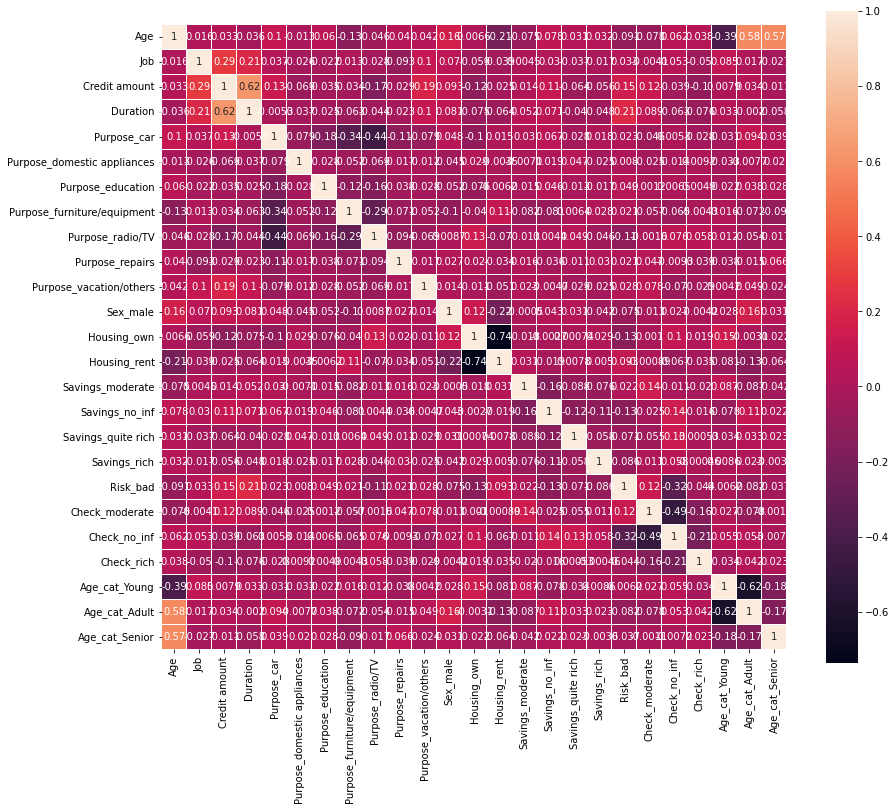

In [50]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_auc_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [52]:
df_credit['Risk_bad']

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Risk_bad, Length: 1000, dtype: uint8

In [53]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [54]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [55]:
df_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

# **6 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [56]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,75,100],
              "max_features": [4,7,15,20,24]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.022 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.111 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.065 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.196 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.087 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.044 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.178 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.152 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.174 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.087 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

KeyboardInterrupt: ignored

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [57]:
rf = RandomForestClassifier(max_depth=None, max_features=20, n_estimators=3, random_state=0)
# rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=25, random_state=0)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=3, random_state=0)

In [58]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)
y_pred_prob=rf.predict_proba(X_test)
# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
# print(roc_auc_score(y_test,y_pred))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

rf_og =rf

0.712
0.7157849563046191


[[147  31]
 [ 41  31]]


0.4428571428571429


## Task 2

In [59]:
df_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

In [60]:
test_df =  pd.DataFrame(X_test, columns=['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'])

In [61]:
test_df['Risk_bad'] = y_test

In [62]:
test_df['Sex_male']

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
245    1.0
246    1.0
247    1.0
248    1.0
249    1.0
Name: Sex_male, Length: 250, dtype: float64

### Anti-Classifiction

In [65]:
def anti_class_m(test_df,rf):
  test_male_df = test_df.copy()
  test_female_df = test_df.copy()
  control_df = test_df.copy()

  test_male_df['Sex_male'] = [1 for x in test_male_df.Sex_male.values]
  test_female_df['Sex_male'] = [0 for x in test_female_df.Sex_male.values]

  test_control = control_df.drop('Risk_bad',1).values
  y_preds = rf.predict(test_control).astype('float')
  y_preds_prob = rf.predict_proba(test_control)
  test_male = test_male_df.drop('Risk_bad',1).values
  male_preds = rf.predict(test_male).astype('float')
  male_preds_prob = rf.predict_proba(test_male)
  test_female = test_female_df.drop('Risk_bad',1).values
  female_preds = rf.predict(test_female).astype('float')
  female_preds_prob = rf.predict_proba(test_female)

  male_dif = y_preds-male_preds
  female_dif = y_preds-female_preds

  male_g2b = len([x for x in male_dif if x == -1])
  male_b2g = len([x for x in male_dif if x == 1])

  
  female_g2b = len([1 for x in female_dif if x == -1])
  female_b2g = len([1 for x in female_dif if x == 1])


  return {"control":{
              "no_of_risky": sum(y_preds),
          },
          "male":{
              "no_of_risky": sum(male_preds),
              "good_to_bad": male_g2b,
              "bad_to_good": male_b2g,
          },
              # "prob of risky": male_preds_prob},
          "female":{
              "no_of_risky": sum(female_preds),
              # "prob of risky": female_preds_prob},
              "good_to_bad":female_g2b,
              "bad_to_good":female_b2g},
          "total_count":len(y_preds)
        }

In [66]:
res = anti_class_m(test_df,rf)
res

{'control': {'no_of_risky': 62.0},
 'female': {'bad_to_good': 6, 'good_to_bad': 2, 'no_of_risky': 58.0},
 'male': {'bad_to_good': 0, 'good_to_bad': 3, 'no_of_risky': 65.0},
 'total_count': 250}

In [ ]:
test_male_df = test_df.copy()
test_female_df = test_df.copy()

In [ ]:
test_male_df['Sex_male'] = [1 for x in test_male_df.Sex_male.values]
test_male_df['Sex_male'] 

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: Sex_male, Length: 200, dtype: int64

In [ ]:
test_female_df['Sex_male'] = [0 for x in test_female_df.Sex_male.values]
test_female_df['Sex_male']

0      0
1      0
2      0
3      0
4      0
      ..
245    0
246    0
247    0
248    0
249    0
Name: Sex_male, Length: 250, dtype: int64

In [ ]:
test_male = test_male_df.drop('Risk_bad',1).values
male_preds = rf.predict(test_male)
male_preds_prob = rf.predict_proba(test_male)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
test_female = test_female_df.drop('Risk_bad',1).values
female_preds = rf.predict(test_female)
female_preds_prob = rf.predict_proba(test_female)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
sum(male_preds),sum(female_preds),sum(y_pred)

(65, 58, 62)

### Anti Classification 2

In [ ]:
def anti_class_2(test_df,rf):
    control_df = test_df.copy()
    test_df_flipped=test_df.copy()
    test_df_flipped['Sex_male'] = [1-x for x in test_df_flipped.Sex_male.values]
    test_flipped = test_df_flipped.drop('Risk_bad', 1).values
    test_control = control_df.drop('Risk_bad', 1).values
    flipped_preds = rf.predict(test_flipped)
    flipped_preds_prob = rf.predict_proba(test_flipped)
    y_preds = rf.predict(test_control)
    y_preds_prob = rf.predict_proba(test_control)
    differences = 0
    for i in range(len(y_pred)):
      if y_preds[i] != flipped_preds[i]:
        differences += 1

    return (differences,differences/len(y_pred))

In [ ]:
anti_class_2(test_df,rf)

IndexError: ignored

In [ ]:
test_df_flipped=test_df.copy()
test_df_flipped['Sex_male'] = [1-x for x in test_df_flipped.Sex_male.values]
test_df_flipped['Sex_male'] #It is properly flipped

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
245    0.0
246    1.0
247    1.0
248    0.0
249    0.0
Name: Sex_male, Length: 250, dtype: float64

In [ ]:
test_flipped = test_df_flipped.drop('Risk_bad', 1).values
flipped_preds = rf.predict(test_flipped)
flipped_preds_prob = rf.predict_proba(test_flipped)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
differences = 0

for i in range(len(y_pred)):
  if y_pred[i] != flipped_preds[i]:
    differences += 1

print(differences,differences/len(y_pred))

In [ ]:
differences=0

for i in range(len(y_pred)):
  # print(y_pred_prob[i][0],flipped_preds_prob[i][0])
  if abs(y_pred_prob[i][1]-flipped_preds_prob[i][1]) >= 0.33:
      print(y_pred_prob[i][1],flipped_preds_prob[i][1])

      differences+=1
print(differences)

### Group Fairness

In [67]:
def group_fair(test_df,rf,threshold_m, threshold_f):
  temp_df = test_df.copy()
  test_control = temp_df.drop('Risk_bad',1).values
  # y_preds = rf.predict(test_control)
  y_preds_prob = rf.predict_proba(test_control)
  # y_preds = (y_preds_prob [:,1] >= threshold).astype('int')
  temp_df['predicted_prob_risk_bad'] = y_preds_prob[:,1]
  male_df = temp_df[temp_df.Sex_male==1]
  female_df = temp_df[temp_df.Sex_male==0]

  male_pred = (male_df['predicted_prob_risk_bad'] >=threshold_m).astype(int)
  female_pred = (female_df['predicted_prob_risk_bad'] >= threshold_f).astype(int)

  risky_male = sum(male_pred)
  risky_female = sum(female_pred)
  total_male = len(male_pred)
  total_female = len(female_pred)

  return {
      "risky_males": risky_male,
      "risky_females": risky_female,
      "total_males": total_male,
      "total_females": total_female,
      "percent_risky_males": risky_male/total_male,
      "percent_risky_females": risky_female/total_female
  }

In [ ]:
group_fair(test_df,rf_og,0.5,0.5)

{'percent_risky_females': 0.2465753424657534,
 'percent_risky_males': 0.24858757062146894,
 'risky_females': 18,
 'risky_males': 44,
 'total_females': 73,
 'total_males': 177}

In [68]:
group_fair(test_df,rf_og,0.5,0.5)


{'percent_risky_females': 0.2465753424657534,
 'percent_risky_males': 0.24858757062146894,
 'risky_females': 18,
 'risky_males': 44,
 'total_females': 73,
 'total_males': 177}

In [ ]:
test_df['predicted_risk_bad'] = y_pred
test_df

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,Risk_bad,predicted_risk_bad
0,24.0,2.0,8.067776,18.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,35.0,1.0,8.384804,18.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
2,32.0,2.0,7.751475,24.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
3,23.0,2.0,7.167809,12.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
4,35.0,3.0,8.889170,33.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,35.0,2.0,7.251345,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
246,74.0,1.0,8.145550,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
247,51.0,2.0,8.470311,11.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
248,52.0,1.0,7.747165,10.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [ ]:
test_df[test_df.Sex_male == 1][test_df.predicted_risk_bad == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_quite rich,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,Risk_bad,predicted_risk_bad
2,32.0,2.0,7.751475,24.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
4,35.0,3.0,8.889170,33.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
5,64.0,1.0,7.776535,24.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
6,41.0,2.0,7.657283,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
7,20.0,2.0,6.371612,12.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,54.0,2.0,7.720905,24.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
245,35.0,2.0,7.251345,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
246,74.0,1.0,8.145550,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
247,51.0,2.0,8.470311,11.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


In [ ]:
risky_male = len(test_df[test_df.Sex_male == 1][test_df.predicted_risk_bad == 1])
risky_female = len(test_df[test_df.Sex_male == 0][test_df.predicted_risk_bad == 1])

total_male = len(test_df[test_df.Sex_male == 1])
total_female = len(test_df[test_df.Sex_male == 0])
print(risky_female,total_female)
print(risky_male,total_male)
risky_male/total_male, risky_female/total_female

18 73
44 177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(0.24858757062146894, 0.2465753424657534)

### Seperation

In [88]:
def seperation_2(test_df,rf,threshold=0.5):
  temp_df = test_df.copy()
  test_control = temp_df.drop('Risk_bad',1).values
  y_preds_prob = rf.predict_proba(test_control)
  y_preds = (y_preds_prob [:,1] >= threshold).astype('int')
  temp_df['predicted_risk_bad'] = y_preds
 
  male_df = temp_df[temp_df.Sex_male==1].copy()
  female_df = temp_df[temp_df.Sex_male==0].copy()



  male_df_fpr = len(male_df[male_df.predicted_risk_bad==0][male_df.Risk_bad==1])/len(male_df[male_df.Risk_bad==1])
  male_df_fnr = len(male_df[male_df.predicted_risk_bad==1][male_df.Risk_bad==0])/len(male_df[male_df.Risk_bad==0])
  female_df_fpr = len(female_df[female_df.predicted_risk_bad==0][female_df.Risk_bad==1])/len(female_df[female_df.Risk_bad==1])
  female_df_fnr = len(female_df[female_df.predicted_risk_bad==1][female_df.Risk_bad==0])/len(female_df[female_df.Risk_bad==0])
  return {
          "male_false_positive_rate": male_df_fpr,
          "male_false_negative_rate": male_df_fnr,
          "female_false_positive_rate": female_df_fpr,
          "female_false_negative_rate": female_df_fnr,
      }

In [87]:
def seperation(test_df,rf,threshold_m=0.5,threshold_f=0.5):
  temp_df = test_df.copy()
  test_control = temp_df.drop('Risk_bad',1).values
  y_preds_prob = rf.predict_proba(test_control)
  # y_preds = (y_preds_prob [:,1] >= threshold).astype('int')
  temp_df['predicted_prob_risk_bad'] = y_preds_prob[:,1]
  male_df = temp_df[temp_df.Sex_male==1]
  female_df = temp_df[temp_df.Sex_male==0]

  male_pred = (male_df['predicted_prob_risk_bad'] >=threshold_m).astype(int)
  female_pred = (female_df['predicted_prob_risk_bad'] >= threshold_f).astype(int)
 
  male_df = temp_df[temp_df.Sex_male==1].copy()
  female_df = temp_df[temp_df.Sex_male==0].copy()

  male_df['predicted_risk_bad'] = male_pred
  female_df['predicted_risk_bad'] = female_pred

  male_df_fpr = len(male_df[male_df.predicted_risk_bad==0][male_df.Risk_bad==1])/len(male_df[male_df.Risk_bad==1])
  male_df_fnr = len(male_df[male_df.predicted_risk_bad==1][male_df.Risk_bad==0])/len(male_df[male_df.Risk_bad==0])
  female_df_fpr = len(female_df[female_df.predicted_risk_bad==0][female_df.Risk_bad==1])/len(female_df[female_df.Risk_bad==1])
  female_df_fnr = len(female_df[female_df.predicted_risk_bad==1][female_df.Risk_bad==0])/len(female_df[female_df.Risk_bad==0])
  return {
          "male_false_positive_rate": male_df_fpr,
          "male_false_negative_rate": male_df_fnr,
          "female_false_positive_rate": female_df_fpr,
          "female_false_negative_rate": female_df_fnr,
      }

In [89]:
seperation_2(test_df,rf_og)

{'female_false_negative_rate': 0.1568627450980392,
 'female_false_positive_rate': 0.5454545454545454,
 'male_false_negative_rate': 0.18110236220472442,
 'male_false_positive_rate': 0.58}

In [90]:
seperation(test_df,rf_og,0.5,1)

{'female_false_negative_rate': 0.0392156862745098,
 'female_false_positive_rate': 0.9090909090909091,
 'male_false_negative_rate': 0.18110236220472442,
 'male_false_positive_rate': 0.58}

In [ ]:
male_df = test_df[test_df.Sex_male==1].copy()
female_df = test_df[test_df.Sex_male==0].copy()


In [ ]:
# male_df
male_df_fpr = len(male_df[male_df.predicted_risk_bad==0][male_df.Risk_bad==1])/len(male_df[male_df.Risk_bad==1])
male_df_fnr = len(male_df[male_df.predicted_risk_bad==1][male_df.Risk_bad==0])/len(male_df[male_df.Risk_bad==0])
male_df_fnr,male_df_fpr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(0.18110236220472442, 0.58)

In [ ]:
# female_df
female_df_fpr = len(female_df[female_df.predicted_risk_bad==0][female_df.Risk_bad==1])/len(female_df[female_df.Risk_bad==1])
female_df_fnr = len(female_df[female_df.predicted_risk_bad==1][female_df.Risk_bad==0])/len(female_df[female_df.Risk_bad==0])
female_df_fnr,female_df_fpr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(0.1568627450980392, 0.5454545454545454)

## Task 3


### Tackling Anti-Classification
One way to tackle would be to train a model to not look at the protected attributes.

In [ ]:
df_credit.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

In [ ]:
df_credit_temp = df_credit.drop('Sex_male',1)
df_credit_temp.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Housing_own', 'Housing_rent',
       'Savings_moderate', 'Savings_no_inf', 'Savings_quite rich',
       'Savings_rich', 'Risk_bad', 'Check_moderate', 'Check_no_inf',
       'Check_rich', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior'],
      dtype='object')

In [ ]:

X = df_credit_temp.drop('Risk_bad', 1).values
y = df_credit_temp["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,75,100],
              "max_features": [4,7,15,20,24]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.178 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.222 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.196 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.239 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.174 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.133 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.222 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.130 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.196 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.196 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20, 24],
                         'n_estimators': [3, 5, 10, 25, 50, 75, 100]},
             scoring='recall', verbose=4)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5173913043478261
{'max_depth': 10, 'max_features': 20, 'n_estimators': 3}


In [ ]:
# rf = RandomForestClassifier(max_depth=None, max_features=20, n_estimators=3, random_state=0)
rf_new = RandomForestClassifier(max_depth=10, max_features=20, n_estimators=3, random_state=0)

#trainning with the best params
rf_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=20, n_estimators=3,
                       random_state=0)

In [ ]:
#Testing the model 
#Predicting using our  model
y_pred = rf_new.predict(X_test)
y_pred_prob=rf_new.predict_proba(X_test)
# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
# print(roc_auc_score(y_test,y_pred))
print(roc_auc_score(y_test, rf_new.predict_proba(X_test)[:, 1]))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.72
0.6816479400749064


[[150  28]
 [ 42  30]]


0.4335260115606937


### Tackling Group Fairness
Varying the threshold to analyze how much the group precision changes

In [79]:
from tqdm import tqdm
best_diff = 1
best_thresh_m = 0
best_thresh_f =0
for k in tqdm(range(1,100)):
  m=k/100
  for i in range(1,100):
    j = i/100
    res = group_fair(test_df,rf_og,j,m)
    diff = abs(res['percent_risky_males']-res['percent_risky_females'])
    # print("diff",diff)
    if diff < best_diff:
      print("Updated at male_threshold "+str(j)+" and female_threshold "+str(m)+" with "+str(diff)+" improving on "+str(best_diff))
      best_thresh_m =j
      best_diff = diff
      best_thresh_f = m

  

  0%|          | 0/99 [00:00<?, ?it/s]

Updated at male_threshold 0.01 and female_threshold 0.01 with 0.05316925934525196 improving on 1


 33%|███▎      | 33/99 [00:22<00:29,  2.25it/s]

Updated at male_threshold 0.34 and female_threshold 0.34 with 0.0020122281557155286 improving on 0.05316925934525196


100%|██████████| 99/99 [00:49<00:00,  1.99it/s]


In [83]:
best_thresh_m,best_thresh_f,group_fair(test_df,rf,0.34,0.34)

(0.34,
 0.34,
 {'percent_risky_females': 0.2465753424657534,
  'percent_risky_males': 0.24858757062146894,
  'risky_females': 18,
  'risky_males': 44,
  'total_females': 73,
  'total_males': 177})

In [85]:
# At 0.34
test_control = test_df.drop('Risk_bad',1).values
y_preds_prob = rf.predict_proba(test_control)
y_preds = (y_preds_prob [:,1] >= 0.6).astype('int')
y_pred=y_preds
print(accuracy_score(y_test,y_pred))
# print(roc_auc_score(y_test,y_pred))
print(roc_auc_score(y_test, rf_og.predict_proba(X_test)[:, 1]))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.712
0.7157849563046191


[[147  31]
 [ 41  31]]


0.4428571428571429


### Tackling seperation

In [ ]:
seperation(test_df,rf_og,1)

{'female_false_negative_rate': 0.0392156862745098,
 'female_false_positive_rate': 0.9090909090909091,
 'male_false_negative_rate': 0.047244094488188976,
 'male_false_positive_rate': 0.76}

In [92]:
from tqdm import tqdm
best_diff = 1
best_thresh_m = 0
best_thresh_f =0
for k in tqdm(range(1,100)):
  m=k/100
  for i in range(1,100):
    j = i/100
    res = seperation(test_df,rf_og,j,m)
    diff = abs(res['female_false_negative_rate']-res['male_false_negative_rate']) + abs(res['female_false_positive_rate']-res['male_false_positive_rate'])
    if diff < best_diff:
      print("Updated at male_threshold "+str(j)+" and female_threshold "+str(m)+" with "+str(diff)+" improving on "+str(best_diff))
      best_thresh_m =j
      best_diff = diff
      best_thresh_f = m

  0%|          | 0/99 [00:00<?, ?it/s]

Updated at male_threshold 0.01 and female_threshold 0.01 with 0.08758740718907462 improving on 1


 33%|███▎      | 33/99 [00:45<01:20,  1.22s/it]

Updated at male_threshold 0.34 and female_threshold 0.34 with 0.05878507165213975 improving on 0.08758740718907462


100%|██████████| 99/99 [02:05<00:00,  1.27s/it]


In [93]:
best_thresh_m,best_thresh_f

(0.34, 0.34)

Very sucks results! How can I increase my model? 

# **7.2 Model 2:** <a id="Modelling 2"></a> <br>

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.7053333333333334


In [ ]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.648
0.6122034956304618


[[124  54]
 [ 34  38]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.53      0.46        72

    accuracy                           0.65       250
   macro avg       0.60      0.61      0.60       250
weighted avg       0.68      0.65      0.66       250



With the Gaussian Model we got a best recall. 

## Let's verify the ROC curve

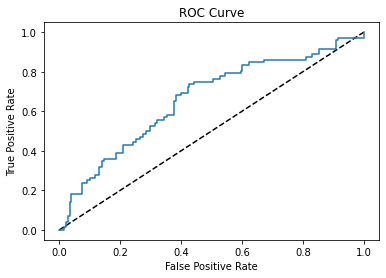

In [ ]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7066666666666668


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.72
0.6338171036204744


[[149  29]
 [ 41  31]]


0.44540229885057464


## Implementing a pipeline of models 

In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=2),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

How can I avoid of this 

# Please, how can I increase this sucks models ?

In [ ]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'subsample': 0.85}

In [ ]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.756
0.6632334581772784


[[157  21]
 [ 40  32]]


How can I avoid this error? 

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [ ]:
print(roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]))

0.6945224719101124
